In [ ]:
!pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import joblib
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import lightgbm as lgb

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NF-CSE-CIC-IDS2018.csv')
data = pd.DataFrame(data)
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,0,Benign


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392401 entries, 0 to 8392400
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
dtypes: float64(1), int64(10), object(3)
memory usage: 896.4+ MB


In [ ]:
data.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64

In [ ]:
count = data.Attack.value_counts()
percentages = data['Attack'].value_counts(normalize=True) * 100
print("Counts:\n", count)
print("\nPercentages:\n", percentages)

Counts:
 Attack
Benign                      7373198
DDoS attacks-LOIC-HTTP       378199
FTP-BruteForce               193360
DoS attacks-Hulk             108136
DoS attacks-SlowHTTPTest     105550
SSH-Bruteforce                94237
Infilteration                 62072
DoS attacks-GoldenEye         32850
DoS attacks-Slowloris         22825
Bot                           15683
Brute Force -Web               2613
Brute Force -XSS               1745
DDOS attack-LOIC-UDP           1667
DDOS attack-HOIC                230
SQL Injection                    36
Name: count, dtype: int64

Percentages:
 Attack
Benign                      87.855645
DDoS attacks-LOIC-HTTP       4.506446
FTP-BruteForce               2.303989
DoS attacks-Hulk             1.288499
DoS attacks-SlowHTTPTest     1.257685
SSH-Bruteforce               1.122885
Infilteration                0.739621
DoS attacks-GoldenEye        0.391426
DoS attacks-Slowloris        0.271972
Bot                          0.186871
Brute Force -Web

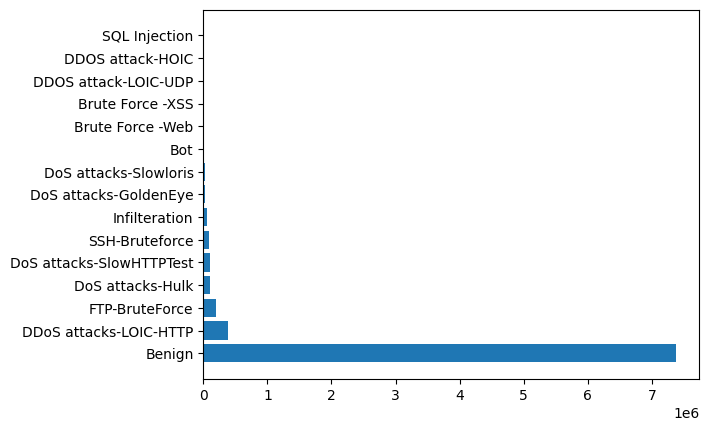

In [ ]:
plt.barh(count.index,count)
plt.show()

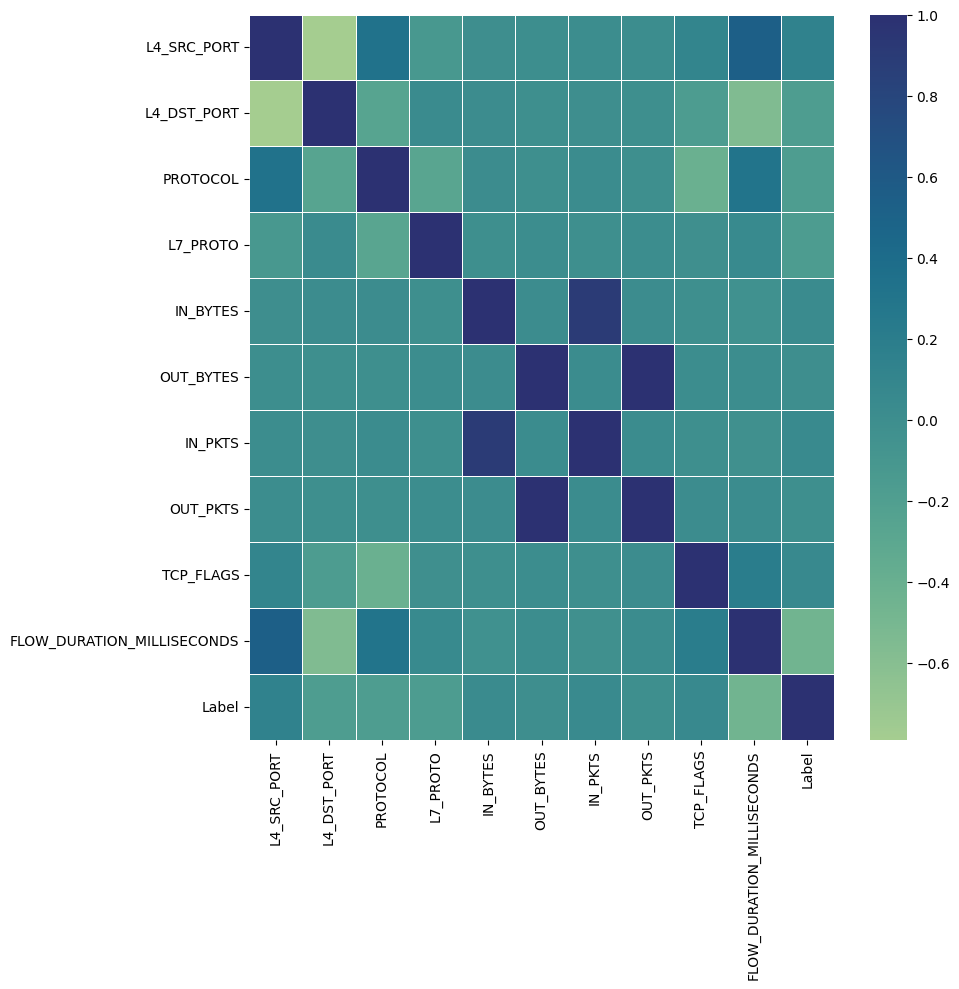

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, linewidths=.5, cmap="crest")
plt.tight_layout()
plt.show()

In [ ]:
label_encoder = LabelEncoder()
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])

le(data)
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,21062,51128,12379,443,6,91.000,152,0,3,0,194,4285680,0,0
1,56409,443,6430,51036,6,91.178,994,979,7,7,24,4234714,0,0
2,5371,12262,6430,445,6,0.000,585,344,5,4,30,4294106,0,0
3,21062,61023,6297,53,17,0.000,136,168,2,2,0,4293985,0,0
4,56485,443,6430,51037,6,91.178,72,40,1,1,24,4294845,0,0


In [ ]:
X = data.drop(['Label','Attack'],axis=1)
y = data['Label']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train, weight=[class_weights_dict[i] for i in y_train])
val_data = lgb.Dataset(X_val, label=y_val, weight=[class_weights_dict[i] for i in y_val])
# Set parameters
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1,
    'n_jobs': -1,
    'early_stopping_rounds': 10
}

bst = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
)

y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
y_pred_max = y_pred.argmax(axis=1)


In [ ]:
y_val_inverse = label_encoder.inverse_transform(y_val)
y_pred_max_inverse = label_encoder.inverse_transform(y_pred_max)

print(classification_report(y_val_inverse, y_pred_max_inverse))
print("Confusion Matrix:\n", confusion_matrix(y_val_inverse, y_pred_max_inverse))

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99   1474640
         Bot       0.93      1.00      0.96    203841

    accuracy                           0.99   1678481
   macro avg       0.96      0.99      0.98   1678481
weighted avg       0.99      0.99      0.99   1678481

Confusion Matrix:
 [[1459197   15443]
 [    175  203666]]


In [ ]:
y_pred_proba = y_pred

roc_auc_scores = []
for class_idx in range(len(np.unique(y_val))):
    y_true_class = (y_val == class_idx).astype(int)
    y_pred_class = y_pred_proba[:, class_idx]
    roc_auc = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(roc_auc)

mean_roc_auc = np.mean(roc_auc_scores)

print("ROC AUC Score (Mean):", mean_roc_auc)

ROC AUC Score (Mean): 0.9998118744106721


In [ ]:
joblib.dump(bst, 'Malacious_traffic_classifier.pkl',compress=9)

['Malacious_traffic_classifier.pkl']

In [ ]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
from sklearn.preprocessing import LabelEncoder
def process_input(df, label_encoder):

    label_encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = label_encoder.fit_transform(df[col])


    model = joblib.load('Malacious_traffic_classifier.pkl')
    pred = model.predict(df)
    if model.params['objective'] == 'binary':
        predicted_class = (pred > 0.5).astype(int)
    else:
        predicted_class = np.argmax(pred, axis=1)

    predicted_label = label_encoder.inverse_transform(predicted_class)

    print(f"Prediction Probabilities: {pred}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Predicted Label: {predicted_label[0]}")
def main():
  src_ip=input('Enter src ip:')
  src_port=int(input("Enter src port:"))
  dst_ip=input('Enter dest ip:')
  dst_port=int(input("Enter dest port:"))
  protocol=int(input("Enter the protocol:"))
  l7_proto=int(input("Enter the l7 proto:"))
  in_bytes=int(input("Enter the in bytes:"))
  out_bytes=int(input("Enter the out bytes:"))
  in_pkts=int(input("Enter the in pkts:"))
  out_pkts=int(input("Enter the out pkts:"))
  tcp_flags=int(input("Enter the tcp flags:"))
  flow_duration=int(input("Enter the flow duration:"))
  data = pd.DataFrame({
                'IPV4_SRC_ADDR': [src_ip],
                'L4_SRC_PORT': [src_port],
                'IPV4_DST_ADDR': [dst_ip],
                'L4_DST_PORT': [dst_port],
                'PROTOCOL': [protocol],
                'L7_PROTO': [l7_proto],
                'IN_BYTES': [in_bytes],
               'OUT_BYTES': [out_bytes],
                'IN_PKTS': [in_pkts],
                'OUT_PKTS': [out_pkts],
                'TCP_FLAGS': [tcp_flags],
                'FLOW_DURATION':[flow_duration],
            })

  label_encoder = joblib.load('label_encoder.pkl')
  process_input(data, label_encoder)
if __name__ == "__main__":
    main()


Enter src ip:192.13.24.31
Enter src port:443
Enter dest ip:193.32.21.34
Enter dest port:25
Enter the protocol:25
Enter the l7 proto:91
Enter the in bytes:321
Enter the out bytes:202
Enter the in pkts:6
Enter the out pkts:2
Enter the tcp flags:36
Enter the flow duration:675654
Prediction Probabilities: [[9.99848992e-01 1.51008233e-04]]
Predicted Class: [0]
Predicted Label: 193.32.21.34
